# Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações adicionais

In [2]:
plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

# Carregando o banco de dados

In [3]:
banco = pd.read_excel("dataset.xlsx")

In [4]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             570 non-null    int64  
 1   Place          570 non-null    object 
 2   Cod_cycle      570 non-null    int64  
 3   Zone           570 non-null    int64  
 4   cota           570 non-null    float64
 5   prof_local(m)  570 non-null    float64
 6   Mes            570 non-null    int64  
 7   Year           570 non-null    int64  
 8   Temp           564 non-null    float64
 9   TotalP         570 non-null    float64
 10  Chl            570 non-null    float64
 11  Secchi         570 non-null    float64
 12  Turbidity      570 non-null    float64
 13  STS            570 non-null    float64
 14  DO             570 non-null    float64
 15  OrthoP (mg/L)  550 non-null    float64
 16  Ammonium       570 non-null    float64
dtypes: float64(11), int64(5), object(1)
memory usage: 75.8

In [5]:
banco["Zone"].value_counts()

0    202
1    195
2    173
Name: Zone, dtype: int64

## Valores nulos

In [6]:
banco.isnull().sum()

ID                0
Place             0
Cod_cycle         0
Zone              0
cota              0
prof_local(m)     0
Mes               0
Year              0
Temp              6
TotalP            0
Chl               0
Secchi            0
Turbidity         0
STS               0
DO                0
OrthoP (mg/L)    20
Ammonium          0
dtype: int64

In [7]:
banco = banco.dropna()

# Exploratória

<Figure size 720x432 with 0 Axes>

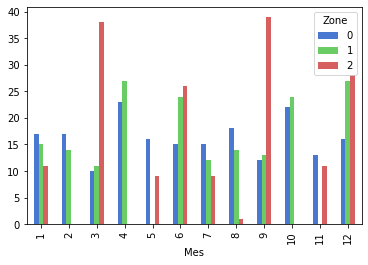

In [8]:
# banco.groupby("Year")[["Year", "Zone"]].head(6)

plt.figure(figsize = [10, 6])

banco[["Mes", "Zone"]].reset_index().groupby(["Mes", "Zone"], as_index = False).size().unstack().plot.bar()

plt.show()

## OneHotEncoding para a variável Place

In [9]:
banco = pd.get_dummies(data = banco, columns = ["Mes", "Year"])

## Selecionando variáveis

In [10]:
# var = ["Zone", "prof_local(m)", "Temp", "TotalP", "Chl", "Secchi ", "Turbidity", "STS", "DO", "OrthoP (mg/L)", "Ammonium"]

# banco[var]


banco = banco.drop(["ID", "Place", "Cod_cycle"], axis = 1)

In [11]:
x = banco.drop("Zone", axis = 1)
y = banco["Zone"]

banco.head()

,Zone,cota,prof_local(m),Temp,TotalP,Chl,Secchi,Turbidity,STS,DO,OrthoP (mg/L),Ammonium,Mes_1,Mes_2,Mes_3,Mes_4,Mes_5,Mes_6,Mes_7,Mes_8,Mes_9,Mes_10,Mes_11,Mes_12,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,0,73.86,30.00,30.4,15.34,4.76,3.0,2.18,1.0,7.30,16.18,35.39,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,73.86,30.00,30.2,18.91,4.05,2.1,2.96,0.6,5.86,15.81,23.50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,73.69,30.00,29.5,20.70,5.95,2.5,2.90,2.8,6.56,5.44,75.84,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,73.67,30.40,31.6,19.94,5.95,1.2,10.10,0.6,7.82,9.51,23.50,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,62.58,19.17,29.8,5.79,3.45,2.6,1.52,2.0,6.05,0.24,12.91,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


In [12]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler

# var = ["cota", "prof_local(m)", "Temp", "TotalP", "Chl", "Secchi ", "Turbidity", "STS", "DO", "OrthoP (mg/L)", "Ammonium"]

# features = banco[var]

# ct = ColumnTransformer([
#         ('somename', StandardScaler(), var)
#     ], remainder='passthrough')

# banco[var] = ct.fit_transform(features)

# banco = pd.concat([banco[var], banco["Zone"]], axis = 1)

# banco.head()

## Separando em treino e teste

In [13]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size = 0.7, random_state = 1234)

In [14]:
x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((382, 34), (382,), (165, 34), (165,))

## Modelos

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


#--- Random Forest

rfc = RandomForestClassifier(n_estimators = 100, 
                             random_state = 1234, 
                             n_jobs = -1)

# 'test_accuracy': array([1.        , 1.        , 1.        , 0.94117647, 1.        ,
#         1.        , 0.9375    , 1.        , 1.        , 0.9375    ])}


#--- Regressão logística 

# rfc = LogisticRegression(random_state = 1234, n_jobs = -1)

# 'test_accuracy': array([0.88235294, 0.94117647, 0.82352941, 0.88235294, 0.94117647,
#         0.8125    , 0.8125    , 0.8125    , 0.8125    , 0.8125    ])}


#--- SVC


# rfc = SVC()

# 'test_accuracy': array([0.64705882, 0.52941176, 0.64705882, 0.58823529, 0.58823529,
#         0.3125    , 0.5625    , 0.5625    , 0.375     , 0.5625    ])}


#--- KNN

# rfc = KNeighborsClassifier(n_neighbors = 3)

# 'test_accuracy': array([0.42857143, 0.64285714, 0.5       , 0.42857143, 0.2962963 ,
#         0.40740741, 0.66666667, 0.37037037, 0.55555556, 0.51851852])}

# # Gaussian Naive Bayes

# rfc = GaussianNB()

# 'test_accuracy': array([0.71428571, 0.64285714, 0.75      , 0.64285714, 0.66666667,
#         0.48148148, 0.7037037 , 0.81481481, 0.7037037 , 0.7037037 ])}


# Perceptron

# rfc = Perceptron()

# 'test_accuracy': array([0.46428571, 0.32142857, 0.32142857, 0.32142857, 0.33333333,
#         0.2962963 , 0.33333333, 0.2962963 , 0.37037037, 0.2962963 ])}


# Linear SVC

# rfc = LinearSVC(max_iter = 500)

# test_accuracy': array([0.42857143, 0.57142857, 0.5       , 0.42857143, 0.51851852,
#         0.37037037, 0.44444444, 0.59259259, 0.48148148, 0.48148148])}


# Stochastic Gradient Descent

# rfc = SGDClassifier()

# 'test_accuracy': array([0.39285714, 0.39285714, 0.39285714, 0.35714286, 0.33333333,
#         0.40740741, 0.33333333, 0.59259259, 0.44444444, 0.37037037])}


# Decision Tree

# rfc = DecisionTreeClassifier(random_state = 1234)

# 'test_accuracy': array([0.75      , 0.64285714, 0.53571429, 0.64285714, 0.59259259,
#         0.40740741, 0.59259259, 0.66666667, 0.55555556, 0.74074074])}


rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1234, verbose=0,
                       warm_start=False)

## Cross Validation


In [16]:
%%time

from sklearn.model_selection import cross_validate 

scoring1 = [
     "accuracy"]

scores = cross_validate(rfc, x_teste, y_teste, cv = 3, scoring = scoring1, n_jobs = -1)

# print("Os scores são:", scores)

# print("Média dos scores:", scores.mean())

Wall time: 3.58 s


In [17]:
scores

{'fit_time': array([0.43087292, 0.32790208, 0.31890631]),
 'score_time': array([0.13096118, 0.10596967, 0.11596632]),
 'test_accuracy': array([0.56363636, 0.58181818, 0.58181818])}

## RandomSearch + CV

In [18]:
#--- Parametros a serem utilizados

parametros = {"max_depth" : [10, 30, 50, 70, 90, None], 
"max_features" : [10, 30, 50, 70, 90, None], 
"max_leaf_nodes" : [10, 30, 50, 70, 90, None], 
"max_samples" : [10, 30, 50, 70, 90, None], 
"min_samples_leaf" : [10, 30, 50, 70, 90, None], 
"min_samples_split" : [10, 30, 50, 70, 90, None]}

#--- Criando a RF

rfc = RandomForestClassifier(n_estimators = 100, 
                             random_state = 1234, 
                             n_jobs = -1)


#--- Criando o objeto

from sklearn.model_selection import RandomizedSearchCV


clf = RandomizedSearchCV(rfc, parametros, random_state = 1234, n_iter = 100, cv = 3, verbose = 0, n_jobs = -1, scoring = "accuracy")

In [19]:
%%time

best_model = clf.fit(x_treino, y_treino)

Wall time: 26.6 s


In [20]:
best_model.best_params_

{'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 30,
 'max_depth': 10}

In [21]:
y_pred = clf.predict(x_teste)

## Random Forest aplicado aos dados de teste

In [22]:
rfc.fit(x_treino, y_treino)

y_pred = rfc.predict(x_teste)

# Métricas a serem avaliadas


In [23]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_teste, y_pred)

print("Accuracy:", acc)

Accuracy: 0.703030303030303


In [24]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, y_pred))

[[37 19  3]
 [13 34  5]
 [ 1  8 45]]


In [25]:
pd.crosstab(y_teste, y_pred, rownames = ["True"], colnames = ["Predicted"], margins = True)

Predicted,0,1,2,All
True,,,,
0,37,19,3,59
1,13,34,5,52
2,1,8,45,54
All,51,61,53,165


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.63      0.67        59
           1       0.56      0.65      0.60        52
           2       0.85      0.83      0.84        54

    accuracy                           0.70       165
   macro avg       0.71      0.70      0.71       165
weighted avg       0.71      0.70      0.71       165



In [27]:
pd.DataFrame(rfc.feature_importances_, x_teste.columns).reset_index().rename(columns = {0: "Valor", "index": "Variável"}).sort_values("Valor", ascending = False).round(5)

,Variável,Valor
1,prof_local(m),0.13517
7,STS,0.10000
5,Secchi,0.09917
3,TotalP,0.07758
6,Turbidity,0.07573
4,Chl,0.07320
2,Temp,0.06621
9,OrthoP (mg/L),0.06103
8,DO,0.05770
0,cota,0.05713


In [28]:
 x_teste.columns

Index(['cota', 'prof_local(m)', 'Temp', 'TotalP', 'Chl', 'Secchi ',
       'Turbidity', 'STS', 'DO', 'OrthoP (mg/L)', 'Ammonium', 'Mes_1', 'Mes_2',
       'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10',
       'Mes_11', 'Mes_12', 'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009',
       'Year_2010', 'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014',
       'Year_2015', 'Year_2016'],
      dtype='object')